# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

**Background of Dataset**

According to the materials and methods section of the "Using Data Mining" paper, this dataset represents 17 campaigns occurring between May 2008 and November 2010

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [6]:
import pandas as pd

In [8]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')

In [10]:
df.head(50)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [12]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



**Feature Understanding**

Per the instructions, we do not need featues 16-20, so those can be dropped.  Per the feature notes, call duration cannot be known before the call, and so it should not be used in trying to create a predictive algorigthm to decide whether to conduct the call in the first place, so that should also be dropped.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

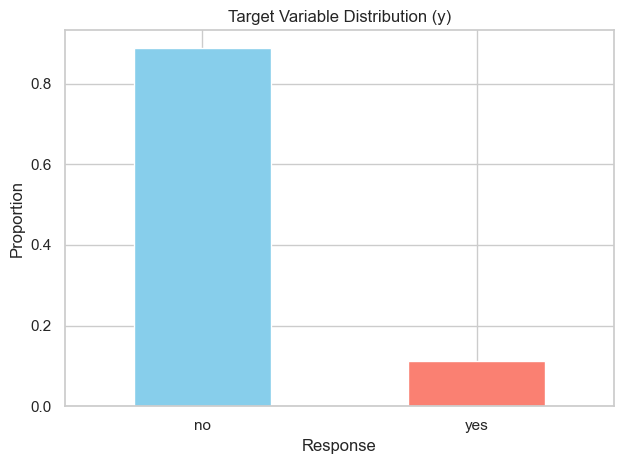

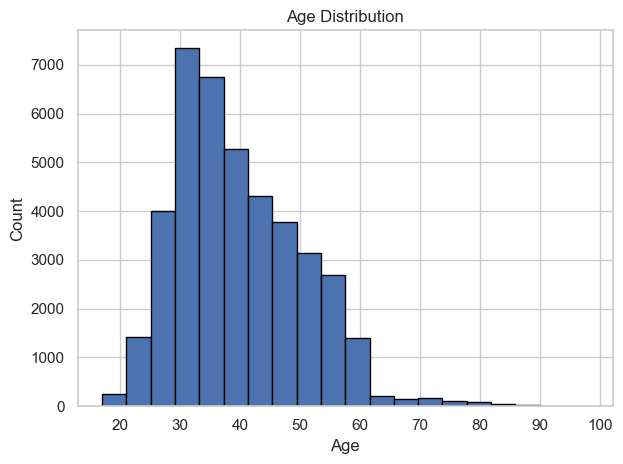

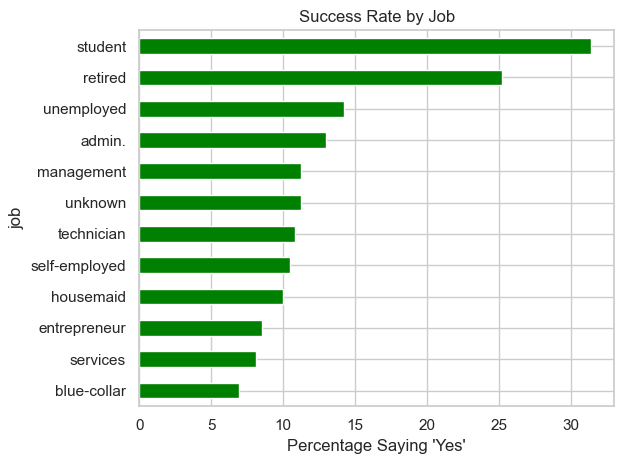

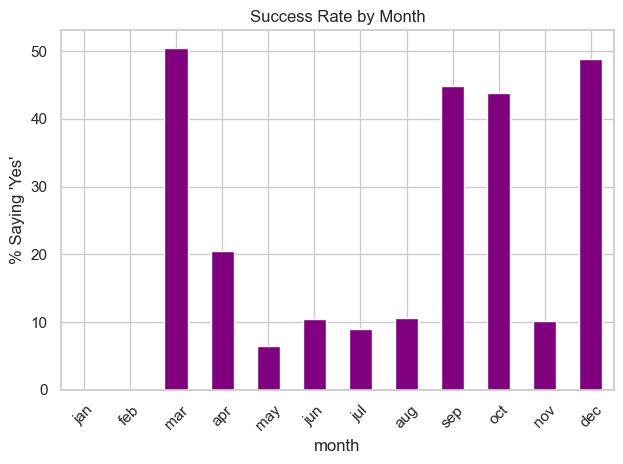

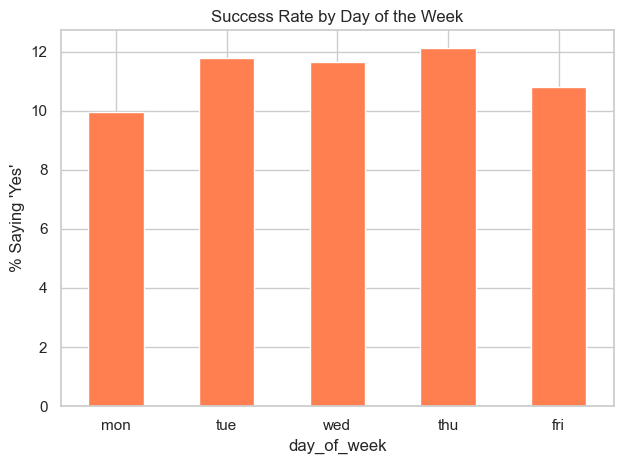

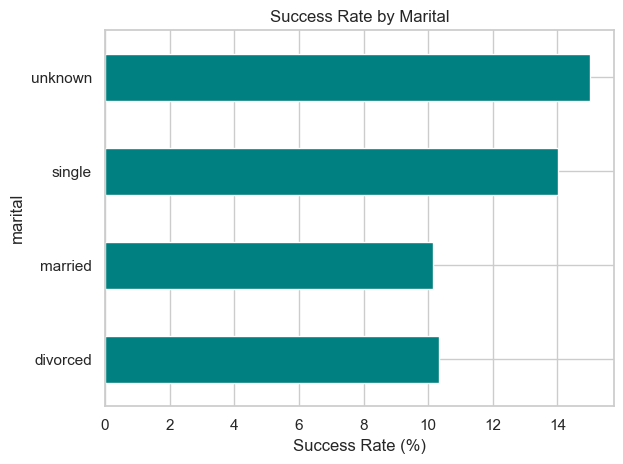

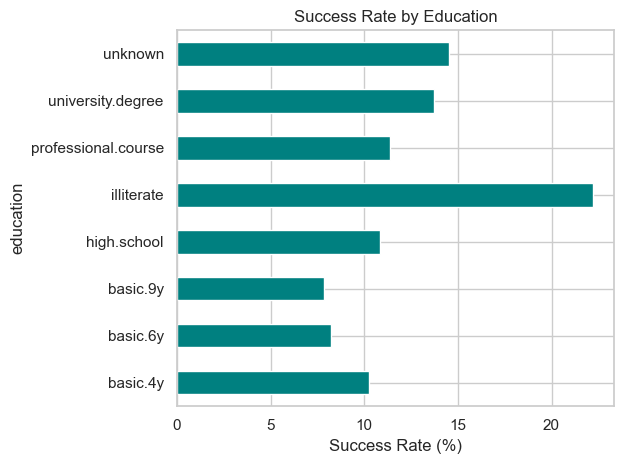

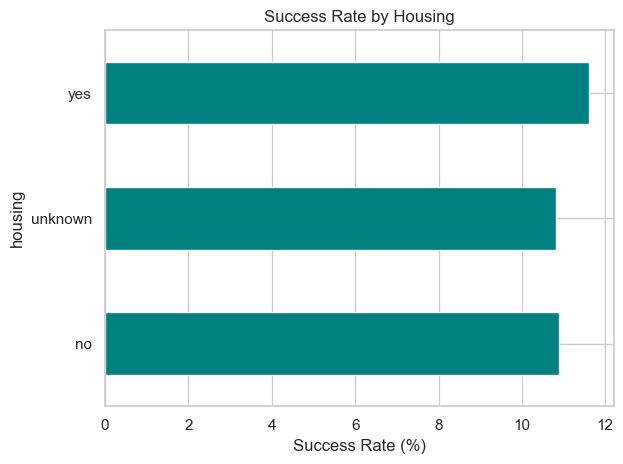

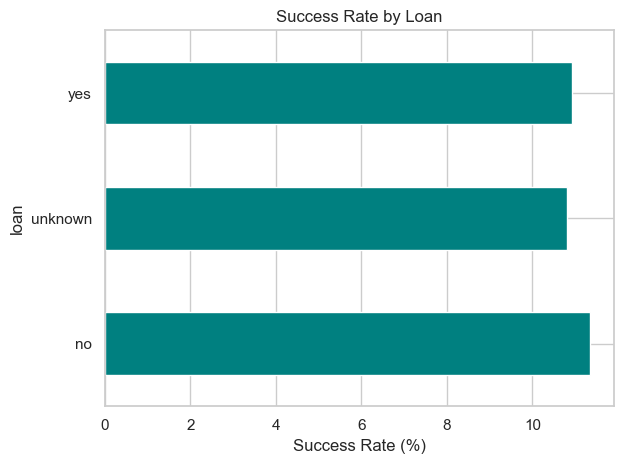

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Variable Distribution
df['y'].value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Target Variable Distribution (y)")
plt.ylabel("Proportion")
plt.xlabel("Response")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Age Distribution
df['age'].hist(bins=20, edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Success by Job
job_success = df.groupby('job')['y'].value_counts(normalize=True).unstack().fillna(0)['yes'] * 100
job_success.sort_values().plot(kind='barh', color='green')
plt.title("Success Rate by Job")
plt.xlabel("Percentage Saying 'Yes'")
plt.tight_layout()
plt.show()

# Success by Month 
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
month_success = (
    df.groupby('month')['y']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)['yes'] * 100
).reindex(month_order)

month_success.plot(kind='bar', color='purple')
plt.title("Success Rate by Month")
plt.ylabel("% Saying 'Yes'")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Success by Day
day_order = ['mon', 'tue', 'wed', 'thu', 'fri']
day_success = (
    df.groupby('day_of_week')['y']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)['yes'] * 100
).reindex(day_order)

day_success.plot(kind='bar', color='coral')
plt.title("Success Rate by Day of the Week")
plt.ylabel("% Saying 'Yes'")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Success by Other Categorical
categorical_features = ['marital', 'education', 'housing', 'loan']

for feature in categorical_features:
    plt.figure()
    rate = df.groupby(feature)['y'].value_counts(normalize=True).unstack().fillna(0)['yes'] * 100
    rate.sort_index().plot(kind='barh', color='teal')
    plt.title(f"Success Rate by {feature.capitalize()}")
    plt.xlabel("Success Rate (%)")
    plt.tight_layout()
    plt.show()


**Business Objective**

The business objective is to determine which customers are most likely to respond favorably to direct marketing for financial products, thereby ensuring that bank marketing dollars are spent most effectively.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [22]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Drop columns 11 (index 10) and 16–20 (indices 15–20)
df_dropped = df.drop(df.columns[[10] + list(range(15, 21))], axis=1)

# Separate target 
target = df.iloc[:, 20]  # use .iloc for safe column indexing

# Identify categorical columns
categorical_cols = df_dropped.select_dtypes(include=['object', 'category']).columns

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded = encoder.fit_transform(df_dropped[categorical_cols])

# Create DataFrame from encoded array
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols), index=df_dropped.index)

# Combine encoded and numeric features
df_final = pd.concat([df_dropped.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Preview result
df_final.head()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   campaign                       41188 non-null  int64  
 2   pdays                          41188 non-null  int64  
 3   previous                       41188 non-null  int64  
 4   job_blue-collar                41188 non-null  float64
 5   job_entrepreneur               41188 non-null  float64
 6   job_housemaid                  41188 non-null  float64
 7   job_management                 41188 non-null  float64
 8   job_retired                    41188 non-null  float64
 9   job_self-employed              41188 non-null  float64
 10  job_services                   41188 non-null  float64
 11  job_student                    41188 non-null  float64
 12  job_technician                 41188 non-null 

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

test_size = 0.2
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(
    df_final, target, test_size=test_size, random_state=random_state, stratify=target
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [32]:
print(target.value_counts(normalize=True))

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64


**Baseline**

This suggests that a naive classification -- one that guesses "no" every time -- would be 88.7% accurate.  We'll need to beat at least that for our classifier.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Initialize the model
model = LogisticRegression(max_iter=1000, random_state=42)

# Fit model to training data
model.fit(X_train_scaled, y_train)

# Make predictions 
y_pred = model.predict(X_test_scaled)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='yes')
recall = recall_score(y_test, y_pred, pos_label='yes')
f1 = f1_score(y_test, y_pred, pos_label='yes')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}\n")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8984
Precision: 0.6827
Recall:    0.1832
F1 Score:  0.2889

Confusion Matrix:
[[7231   79]
 [ 758  170]]


### Problem 9: Score the Model

What is the accuracy of your model?

**Logistic Model Accuracy**

The accuracy of a basic logistic regression model is 89.8%, slightly above the baseline.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [51]:
import time
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC()
}

# Store results
results = []

for name, model in models.items():
    start = time.time()

    if name in ["Logistic Regression", "K-Nearest Neighbors", "Support Vector Machine"]:
        model.fit(X_train_scaled, y_train)
        train_preds = model.predict(X_train_scaled)
        test_preds = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        train_preds = model.predict(X_train)
        test_preds = model.predict(X_test)

    elapsed = time.time() - start
    train_acc = accuracy_score(y_train, train_preds)
    test_acc = accuracy_score(y_test, test_preds)
    precision = precision_score(y_test, test_preds, pos_label='yes')
    recall = recall_score(y_test, test_preds, pos_label='yes')
    f1 = f1_score(y_test, test_preds, pos_label='yes')

    results.append({
        "Model": name,
        "Train Time (s)": round(elapsed, 4),
        "Train Accuracy": round(train_acc, 4),
        "Test Accuracy": round(test_acc, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1 Score": round(f1, 4)
    })

# Display results
results_df = pd.DataFrame(results)
results_df.style.set_caption("**Model Comparison**").format(precision=4)


,Model,Train Time (s),Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.0974,0.8971,0.8984,0.6827,0.1832,0.2889
1,K-Nearest Neighbors,1.3864,0.9101,0.8920,0.5463,0.2414,0.3348
2,Decision Tree,0.1456,0.9933,0.8328,0.2805,0.3093,0.2942
3,Support Vector Machine,66.8675,0.9066,0.8999,0.6782,0.2112,0.3221


**Findings**

Per the above, Decision Tree had the highest training accuracy, but dropped significantly on the test data, suggesting overfitting.  All other models performed well on accuracy, though not that much better than baseline (88%).  Logistic Regression and SVM had strong precision, though the most balanced was KNN (as measured by F1).

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

**Adjust Performance Metric**

Rather than accuracy, let's aim for the best F1 score, balancing precision and recall.  On the one hand we don't want to waste marketing dollars (suggesting precision as a metric); on the other we don't want to miss a potential 'yes' (suggesting recall as a metric).  Because F1 considers both, it feels most appropriate here.  Let's tune the models with F1 as the target.

**Remove SVM**

SVM took a long time to run and did not produce much better output than other models.

In [49]:
import time
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.preprocessing import StandardScaler

# Custom F1 scorer
f1_custom = make_scorer(f1_score, pos_label='yes')

# Define models and parameter grids
model_configs = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000, random_state=42),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "penalty": ['l2'],
            "solver": ['lbfgs']
        }
    },
    "K-Nearest Neighbors": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7, 10],
            "weights": ['uniform', 'distance']
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "max_depth": [5, 10, 15],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2]
        }
    }
}

# Store results
f1_results = []

# Loop over models
for name, config in model_configs.items():
    print(f"\nTuning {name}...")
    model = config['model']
    param_grid = config['params']
    
    # Use scaled data where appropriate
    use_scaled = name in ["Logistic Regression", "K-Nearest Neighbors"]
    X_train_used = X_train_scaled if use_scaled else X_train
    X_test_used = X_test_scaled if use_scaled else X_test

    start_time = time.time()

    # GridSearchCV with custom F1 scorer
    grid = GridSearchCV(model, param_grid, cv=5, scoring=f1_custom, n_jobs=2)
    grid.fit(X_train_used, y_train)

    elapsed = time.time() - start_time
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test_used)

    # Collect evaluation metrics
    f1_results.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "Train Time (s)": round(elapsed, 2),
        "Accuracy": round(accuracy_score(y_test, y_pred), 4),
        "Precision": round(precision_score(y_test, y_pred, pos_label='yes'), 4),
        "Recall": round(recall_score(y_test, y_pred, pos_label='yes'), 4),
        "F1 Score": round(f1_score(y_test, y_pred, pos_label='yes'), 4)
    })

# Create and display results
f1_df = pd.DataFrame(f1_results)
print("\nModel Performance (Optimized for F1 Score):")
print(f1_df)



Tuning Logistic Regression...

Tuning K-Nearest Neighbors...

Tuning Decision Tree...

Model Performance (Optimized for F1 Score):
                 Model                                        Best Params  \
0  Logistic Regression       {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}   
1  K-Nearest Neighbors           {'n_neighbors': 3, 'weights': 'uniform'}   
2        Decision Tree  {'max_depth': 10, 'min_samples_leaf': 1, 'min_...   

   Train Time (s)  Accuracy  Precision  Recall  F1 Score  
0            1.41    0.8984     0.6827  0.1832    0.2889  
1            4.94    0.8807     0.4472  0.2511    0.3216  
2            3.05    0.8939     0.5808  0.2091    0.3074  


Top 20 Important Features (KNN - F1 Scored Permutation Importance):
               Feature  Importance
46    poutcome_success    0.067989
2                pdays    0.053966
36           month_mar    0.023903
39           month_oct    0.017071
32           month_aug    0.015231
35           month_jun    0.010602
31   contact_telephone    0.009261
37           month_may    0.008865
38           month_nov    0.007683
42     day_of_week_thu    0.006001
3             previous    0.005825
34           month_jul    0.005742
40           month_sep    0.005450
11         job_student    0.005398
33           month_dec    0.004922
0                  age    0.003390
8          job_retired    0.003241
25     default_unknown    0.002200
18  education_basic.6y    0.001935
28         housing_yes    0.001866


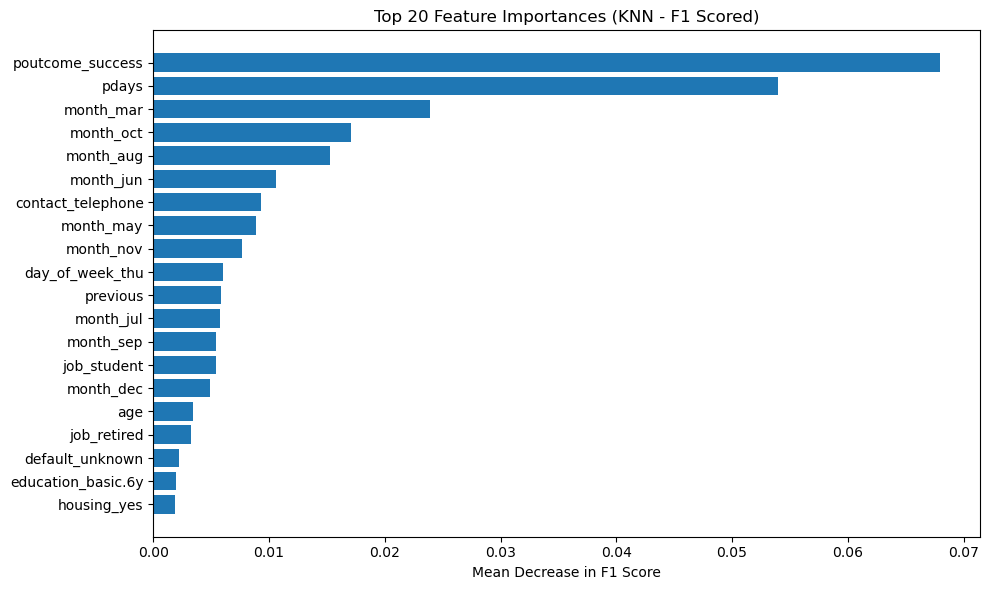

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import f1_score, make_scorer
import pandas as pd
import matplotlib.pyplot as plt

# Fit KNN model
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn.fit(X_train_scaled, y_train)

# Define F1 scorer
f1_scorer = make_scorer(f1_score, pos_label='yes')

# Compute permutation importance using F1 as metric
perm_result = permutation_importance(
    knn,
    X_test_scaled,
    y_test,
    scoring=f1_scorer,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

# Organize results
feature_names = X_train.columns
importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': perm_result.importances_mean
}).sort_values(by='Importance', ascending=False)

# Display top features
print("Top 20 Important Features (KNN - F1 Scored Permutation Importance):")
print(importances.head(20))
plt.figure(figsize=(10, 6))
plt.barh(importances.head(20)['Feature'], importances.head(20)['Importance'])
plt.xlabel('Mean Decrease in F1 Score')
plt.title('Top 20 Feature Importances (KNN - F1 Scored)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [63]:
import pandas as pd

# Identify features to analyze
top_features = [
    'poutcome',         
    'month',            
    'contact',          
    'day_of_week',      
    'job'                
]

# Calculate and display success rates
for feature in top_features:
    print(f"\n✅ Success Rate by '{feature}':\n")
    
    success_rate = (
        (df.groupby(feature)['y']
         .value_counts(normalize=True)
         .unstack()
         .fillna(0)['yes'] * 100)
        .round(2) 
        .sort_values(ascending=False)
    )
    
    print(success_rate.to_string())




✅ Success Rate by 'poutcome':

poutcome
success        65.11
failure        14.23
nonexistent     8.83

✅ Success Rate by 'month':

month
mar    50.55
dec    48.90
sep    44.91
oct    43.87
apr    20.48
aug    10.60
jun    10.51
nov    10.14
jul     9.05
may     6.43

✅ Success Rate by 'contact':

contact
cellular     14.74
telephone     5.23

✅ Success Rate by 'day_of_week':

day_of_week
thu    12.12
tue    11.78
wed    11.67
fri    10.81
mon     9.95

✅ Success Rate by 'job':

job
student          31.43
retired          25.23
unemployed       14.20
admin.           12.97
management       11.22
unknown          11.21
technician       10.83
self-employed    10.49
housemaid        10.00
entrepreneur      8.52
services          8.14
blue-collar       6.89


**Final Analysis**

We have a preliminary predictive algorithm based on a K-Nearest Neighbors (KNN) analysis.  It yields a precision of ~45%, meaning that the customers the model predicted would say "yes," about 45% actually did. So, more than half of the outreach may not lead to conversions — still better than guessing, but room to improve.  It yields a recall of ~25%, meaning that out of all the customers who actually said "yes," the model correctly found only about 1 in 4 of them. That means it's missing many potential successes.  That in turn means that, though this model would provide good guidance in prioritizing marketing, we should not let it act as a total guide of all marketing.

The factors that had the greatest influence on success were:
- Whether prior marketing succeeded with the customer, which makes intuitive sense.
- The number of days since the last contact.
- The month of the contact.  In particular, the sping and fall saw the most success.
- The job of the target.  Students and retired people were most receptive.

##### Questions